0.47999100387096405
[3608.974  3205.3792]
[[115.37751007 -36.00653839]
 [-29.58259392   9.23202133]]


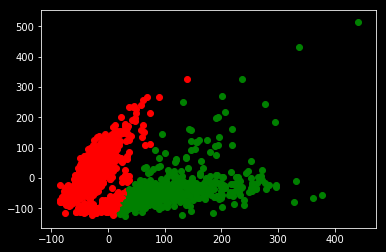

'Runtime: 0:00:18.949660'

In [1]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(2, 10)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.47999128699302673
[3608.9753 3205.3796]
[[ 85.70024109 -54.94696045]
 [-28.96311188  18.5697937 ]]


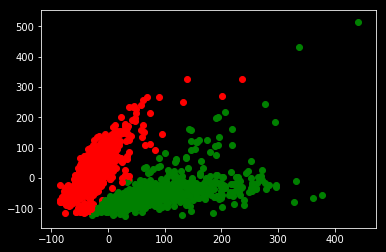

'Runtime: 0:00:16.929325'

In [2]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(2, 10)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.4799911379814148
[3608.9746 3205.3794]
[[ 39.61040115 -55.99443054]
 [-22.96892548  32.46956253]]


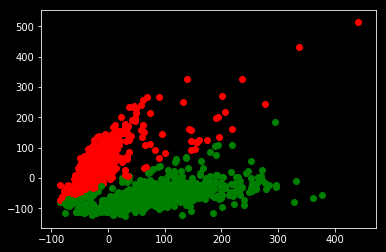

'Runtime: 0:00:21.906557'

In [3]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(2, 10)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.4799913018941879
[3608.9753 3205.38  ]
[[-29.35846138   8.77153015]
 [117.16252899 -35.00503922]]


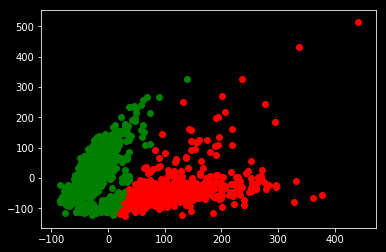

'Runtime: 0:00:27.480480'

In [4]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(2, 100)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


In [5]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(2, 10000)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.47999104857444763
[3608.974  3205.3794]


KeyboardInterrupt: 

0.47999098896980286
[3608.9744 3205.3787]
[[-33.45885086 -40.58294296]
 [-18.14676285  53.39440918]
 [135.7800293  -26.94943237]]


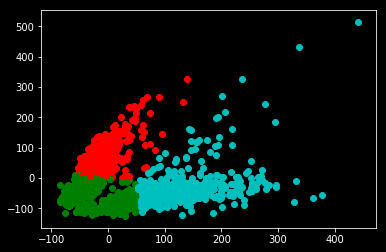

'Runtime: 0:01:38.467082'

In [6]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(3, 1000)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.47999128699302673
[3608.9753 3205.3796]
[[117.64113617 -34.88838577]
 [-29.27424622   8.68175983]]


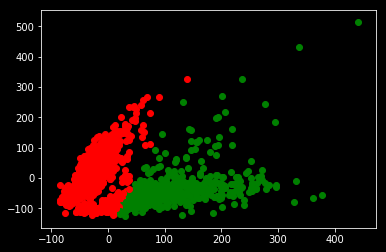

'Runtime: 0:00:18.648112'

In [7]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(2, 100)
plt = pyplot.subplot(111)
colors = ["g","r","c","b","y"]

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


In [8]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(15, 10)
plt = pyplot.subplot(111)
# colors = ["g","r","c","b","y"]
colors = []

for i in range(20):
    colors.append('%06X' % randint(0, 0xFFFFFF))

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.47999125719070435
[3608.9753 3205.3794]


NameError: name 'randint' is not defined

In [9]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from random import randint

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(15, 10)
plt = pyplot.subplot(111)
# colors = ["g","r","c","b","y"]
colors = []

for i in range(20):
    colors.append('%06X' % randint(0, 0xFFFFFF))

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()


0.47999128699302673
[3608.9753 3205.3796]


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

0.4799911379814148
[3608.9744 3205.3796]
[[  1.09591722  99.27801514]
 [222.25114441 -30.89434052]
 [-59.59711075 -56.05263901]
 [ 45.53142548 -68.85436249]
 [ 38.62306213 175.64781189]
 [-12.31324768 -99.47589111]
 [-35.98632431   6.36549759]
 [-19.84339714  68.59436035]
 [-13.44140053  47.9816246 ]
 [104.28565979 -56.02653122]
 [ -8.92958927   7.51623344]
 [-43.33659744 -22.95367622]
 [-33.09612656  32.93188858]
 [206.61036682 204.72898865]
 [132.0027771    1.06393921]]


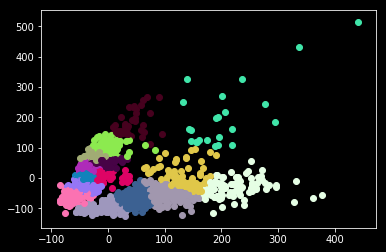

'Runtime: 0:00:16.401120'

In [10]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from random import randint

# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
        

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans(15, 10)
plt = pyplot.subplot(111)
# colors = ["g","r","c","b","y"]
colors = []

for i in range(20):
    colors.append("#" + '%06X' % randint(0, 0xFFFFFF))

for i in range(len(pca_data)):
     plt.scatter(pca_data[i, 0], pca_data[i, 1], color=colors[int(nearest_centroid[i, 0])-1])
pyplot.show()
print(centroids_array)
runtime_end()
